In [4]:
#Importing the necessary Libraries
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [6]:
#Reading the train and test data sets
train_with_id = pd.read_csv("../input/train.csv")
test_with_id = pd.read_csv("../input/test.csv")

In [7]:
#Basic Data Stats
train_with_id.describe().to_csv('basic_data_stats.csv')

In [8]:
#Removing the "id" column as not required for analysis
train_wo_id = train_with_id.loc[:,train_with_id.columns != 'id']

In [9]:
#Creating a Series object containing the column names from the "train.csv"
column_names = pd.Series(train_wo_id.columns)

In [10]:
#checking the numbver of missing values in all the columns
print("We have missing values in the following features \n")
for a in column_names:
    if((train_wo_id[a]==-1).sum() > 0):
        print("total number of missing values in feature \"{}\":{}".format(a,(train_wo_id[a]==-1).sum()))

We have missing values in the following features 

total number of missing values in feature "ps_ind_02_cat":216
total number of missing values in feature "ps_ind_04_cat":83
total number of missing values in feature "ps_ind_05_cat":5809
total number of missing values in feature "ps_reg_03":107772
total number of missing values in feature "ps_car_01_cat":107
total number of missing values in feature "ps_car_02_cat":5
total number of missing values in feature "ps_car_03_cat":411231
total number of missing values in feature "ps_car_05_cat":266551
total number of missing values in feature "ps_car_07_cat":11489
total number of missing values in feature "ps_car_09_cat":569
total number of missing values in feature "ps_car_11":5
total number of missing values in feature "ps_car_12":1
total number of missing values in feature "ps_car_14":42620


In [11]:
#Separating the the continuous variable columns
#This would be used for Statistical 
conti_var_col = pd.Series(list(column_names[column_names.str.contains('cat|bin|target')==False]))

In [12]:
#Grouping the data on the target column and pivoting for the continuous variables
stats_continuous = train_wo_id.groupby('target')[conti_var_col].describe().T
stats_continuous.to_csv('continuous_var_stats.csv')

In [13]:
#Binary Feature Plotting
bin_var_col = pd.Series(list(column_names[column_names.str.contains('bin')==True]))
print("\n")
print("total number of binary variables: {}".format(len(bin_var_col)))
print("total number of \"ind\" binary variables: {}".format(len(list(bin_var_col[bin_var_col.str.contains('ind')==True]))))
print("total number of \"reg\" binary variables: {}".format(len(list(bin_var_col[bin_var_col.str.contains('reg')==True]))))
print("total number of \"car\" binary variables: {}".format(len(list(bin_var_col[bin_var_col.str.contains('car')==True]))))
print("total number of \"calc\" binary variables: {}".format(len(list(bin_var_col[bin_var_col.str.contains('calc')==True]))))
print("\n")



total number of binary variables: 17
total number of "ind" binary variables: 11
total number of "reg" binary variables: 0
total number of "car" binary variables: 0
total number of "calc" binary variables: 6




In [14]:
#Data Transformation for "Grouped Column Bar Graphs"
zero = []
one = []
neg = []

for column in bin_var_col:
    zero.append((train_wo_id[column]==0).sum())
    one.append((train_wo_id[column]==1).sum())
    neg.append((train_wo_id[column]==-1).sum())
#Binary Data Values Sum DataFrame
binary_df = pd.DataFrame(np.column_stack((zero,one,neg,bin_var_col)))
binary_df.columns = ["Z","O","NV","Names"]

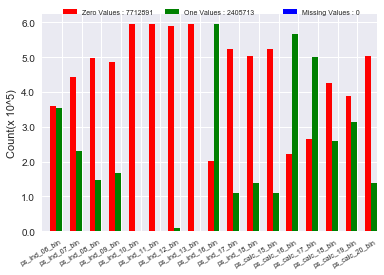

In [15]:
#Initializing a Figure Object
figure_load = plt.figure()
axis1 = figure_load.add_subplot(111) #Creating a single plot
axis2 = axis1.twinx()
axis3 = axis2.twinx()
width = 0.3
a = binary_df.Z.plot(kind="bar",color="red",ax = axis1, width = width, position=2,label="Zero Values")
b = binary_df.O.plot(kind="bar",color="green",ax = axis2, width = width, position=1,label="One Values")
c = binary_df.NV.plot(kind="bar",color="blue",ax = axis3, width = width, position=0,label="Missing Values")
axis1.set_ylabel("Count(x 10^5)")
axis2.get_yaxis().set_visible(False)
axis3.get_yaxis().set_visible(False)
axis1.yaxis.set_ticklabels(axis1.yaxis.set_ticklabels(a.get_yticks()*(1/100000)))
axis1.xaxis.set_ticklabels(binary_df.Names,rotation = 30,horizontalalignment="right",fontsize="x-small")
#Here "Zero Values" is put into a list structure otherwise legend function just takes the input as list of characters and just
#shows the first character
axis1.legend(["Zero Values : {}".format(sum(zero))],loc="upper right",bbox_to_anchor=(0.35, 1.05),fontsize="x-small")
axis2.legend(["One Values : {}".format(sum(one))],loc="upper center",bbox_to_anchor=(0.5, 1.05),fontsize="x-small")
axis3.legend(["Missing Values : {}".format(sum(neg))],loc="upper left",bbox_to_anchor=(0.7, 1.05),fontsize="x-small")
plt.xlim(-1,16)
plt.show()

In [16]:
plt.savefig("binary_variables_distribution.png",bbox_inches = "tight",dpi=600)
#Closing the plot instance
plt.close()

In [17]:
#Plotting the Categorical Variable

In [18]:
cat_var_col = pd.Series(list(column_names[column_names.str.contains('cat')==True]))
print("total number of categorical variables: {}".format(len(cat_var_col)))
print("total number of \"ind\" categorical variables: {}".format(len(list(cat_var_col[cat_var_col.str.contains('ind')==True]))))
print("total number of \"reg\" categorical variables: {}".format(len(list(cat_var_col[cat_var_col.str.contains('reg')==True]))))
print("total number of \"car\" categorical variables: {}".format(len(list(cat_var_col[cat_var_col.str.contains('car')==True]))))
print("total number of \"calc\" categorical variables: {}".format(len(list(cat_var_col[cat_var_col.str.contains('calc')==True]))))
print("\n")

total number of categorical variables: 14
total number of "ind" categorical variables: 3
total number of "reg" categorical variables: 0
total number of "car" categorical variables: 11
total number of "calc" categorical variables: 0




In [19]:
#Data Transformation for Plotting
cat_var = []

for col in cat_var_col:
    lst = train_wo_id.loc[:,col].unique()
    #Removing the NA values as categories
    new_lst = list(filter(lambda a: a!=-1,lst))
    cat_var.append(new_lst)

x = np.matrix(cat_var).T

#Similar to binary transformation
no_var_cat = []
for i in range(x.shape[0]):
    no_var_cat.append(len(x[i,0]))

#Dataframe Object containing Categorical Feature Information
categories_info = pd.DataFrame(np.column_stack((no_var_cat,list(column_names[column_names.str.contains('cat')==True]))))
categories_info.columns= ["Number_Of_Categories","Feature"]
categories_info["Number_Of_Categories"] = categories_info.loc[:,"Number_Of_Categories"].astype(int)
print(categories_info)
#Count for "ind" and "car" type Categorical Features
count_ind = list(categories_info.Feature[categories_info.Feature.str.contains('ind')==True])
count_car = list(categories_info.Feature[categories_info.Feature.str.contains('car')==True])

    Number_Of_Categories        Feature
0                      4  ps_ind_02_cat
1                      2  ps_ind_04_cat
2                      7  ps_ind_05_cat
3                     12  ps_car_01_cat
4                      2  ps_car_02_cat
5                      2  ps_car_03_cat
6                     10  ps_car_04_cat
7                      2  ps_car_05_cat
8                     18  ps_car_06_cat
9                      2  ps_car_07_cat
10                     2  ps_car_08_cat
11                     5  ps_car_09_cat
12                     3  ps_car_10_cat
13                   104  ps_car_11_cat


In [20]:
#Initializing a Figure Object
#Plotting "ind" type feature

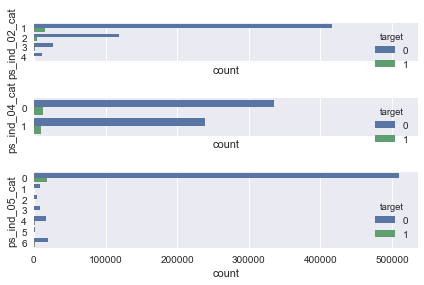

In [21]:
fig,axis = plt.subplots(nrows=3,ncols=1,sharex=True,gridspec_kw = {'height_ratios':[1,1,2]})
for i in range(len(count_ind)):
    sns.countplot(y=count_ind[i],hue="target",data = train_wo_id[train_wo_id.loc[:,count_ind[i]]!=-1],ax=axis[i])
fig.tight_layout()
plt.show()

In [22]:
plt.savefig("categorical_ind_dist.png")
#Closing the plot instance
plt.close()

In [23]:
#Segregating Features with less than 10 categories
small_cat_car = list(categories_info.loc[((categories_info["Number_Of_Categories"] < 10) & (categories_info["Feature"].str.contains("car")==True)),"Feature"])
ratio_list = list(categories_info.loc[((categories_info["Number_Of_Categories"] < 10) & (categories_info["Feature"].str.contains("car")==True)),"Number_Of_Categories"])

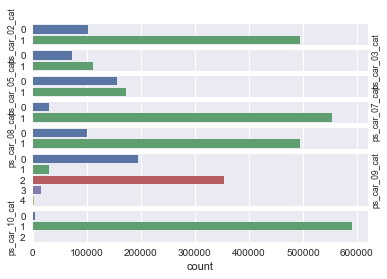

In [24]:
#Initialing Figure Object
fig_new,axis_new=plt.subplots(nrows=len(small_cat_car),ncols=1,sharex = True,gridspec_kw = {'height_ratios':ratio_list})
for i in range(len(small_cat_car)):
    s = sns.countplot(y=small_cat_car[i],data=train_wo_id[train_wo_id.loc[:,small_cat_car[i]]!=-1],ax=axis_new[i])
    s.set_ylabel(s.get_ylabel(),fontsize=8.5)
    s.xaxis.label.set_visible(False)
    if(i%2!=0):
        s.yaxis.set_label_position("right")

s = axis_new[len(small_cat_car)-1]
s.xaxis.label.set_visible(True)
plt.show()

In [25]:
plt.savefig("categorical_car_distribution.png")
#Closing the plot instance
plt.close()

In [26]:
#Plotting the continuous variables for target = 1
print("total number of continuous variables: {}".format(len(conti_var_col)))
print("total number of \"ind\" continuous variables: {}".format(len(list(conti_var_col[conti_var_col.str.contains('ind')==True]))))
print("total number of \"reg\" continuous variables: {}".format(len(list(conti_var_col[conti_var_col.str.contains('reg')==True]))))
print("total number of \"car\" continuous variables: {}".format(len(list(conti_var_col[conti_var_col.str.contains('car')==True]))))
print("total number of \"calc\" continuous variables: {}".format(len(list(conti_var_col[conti_var_col.str.contains('calc')==True]))))
print("\n")

total number of continuous variables: 26
total number of "ind" continuous variables: 4
total number of "reg" continuous variables: 3
total number of "car" continuous variables: 5
total number of "calc" continuous variables: 14




In [27]:
for a in list(conti_var_col):
    if -1 in train_wo_id.loc[:,a].unique(): 
        print("variable \"{0}\" has {1} unique values and with datatype: {2}".format(a,len(list(train_wo_id.loc[:,a].unique()))-1,train_wo_id.loc[:,a].unique().dtype))
    else:
        print("variable \"{0}\" has {1} unique values and with datatype: {2}".format(a,len(list(train_wo_id.loc[:,a].unique())),train_wo_id.loc[:,a].unique().dtype))

variable "ps_ind_01" has 8 unique values and with datatype: int64
variable "ps_ind_03" has 12 unique values and with datatype: int64
variable "ps_ind_14" has 5 unique values and with datatype: int64
variable "ps_ind_15" has 14 unique values and with datatype: int64
variable "ps_reg_01" has 10 unique values and with datatype: float64
variable "ps_reg_02" has 19 unique values and with datatype: float64
variable "ps_reg_03" has 5012 unique values and with datatype: float64
variable "ps_car_11" has 4 unique values and with datatype: int64
variable "ps_car_12" has 183 unique values and with datatype: float64
variable "ps_car_13" has 70482 unique values and with datatype: float64
variable "ps_car_14" has 849 unique values and with datatype: float64
variable "ps_car_15" has 15 unique values and with datatype: float64
variable "ps_calc_01" has 10 unique values and with datatype: float64
variable "ps_calc_02" has 10 unique values and with datatype: float64
variable "ps_calc_03" has 10 unique va

In [28]:
#Data Transformaition for plotting
count_ind_cont = ["target"]+list(conti_var_col[conti_var_col.str.contains('ind')==True])
count_reg_cont = ["target"]+list(conti_var_col[conti_var_col.str.contains('reg')==True])
count_car_cont = ["target"]+list(conti_var_col[conti_var_col.str.contains('car')==True])
count_cal_cont = ["target"]+list(conti_var_col[conti_var_col.str.contains('cal')==True])

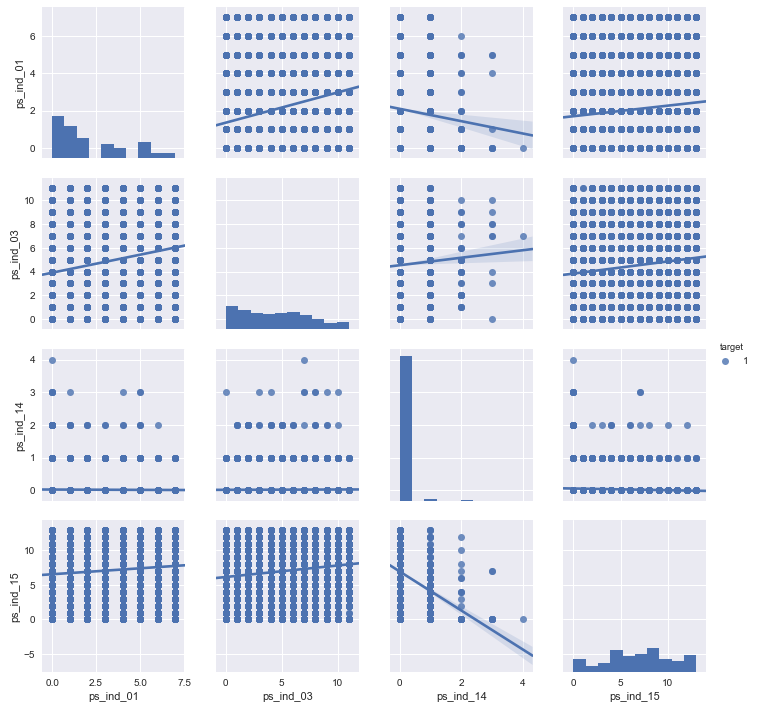

In [29]:
x_ind = train_wo_id.loc[(train_wo_id["target"]==1),count_ind_cont]
sns.pairplot(x_ind,hue="target",vars=list(conti_var_col[conti_var_col.str.contains('ind')==True]),kind="reg")
plt.show()

In [30]:
plt.savefig("continuous_ind_dist.png")
#Closing the plot instance
plt.close()

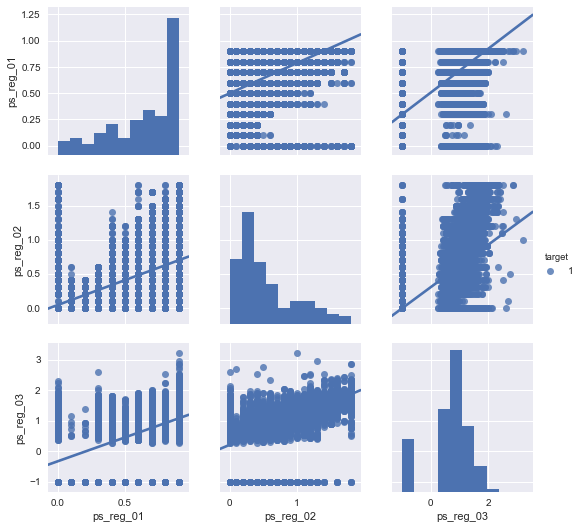

In [31]:
x_reg = train_wo_id.loc[(train_wo_id["target"]==1),count_reg_cont]
sns.pairplot(x_reg,hue="target",vars=list(conti_var_col[conti_var_col.str.contains('reg')==True]),kind="reg")
plt.show()

In [32]:
plt.savefig("continuous_reg_dist.png")
#Closing the plot instance
plt.close()

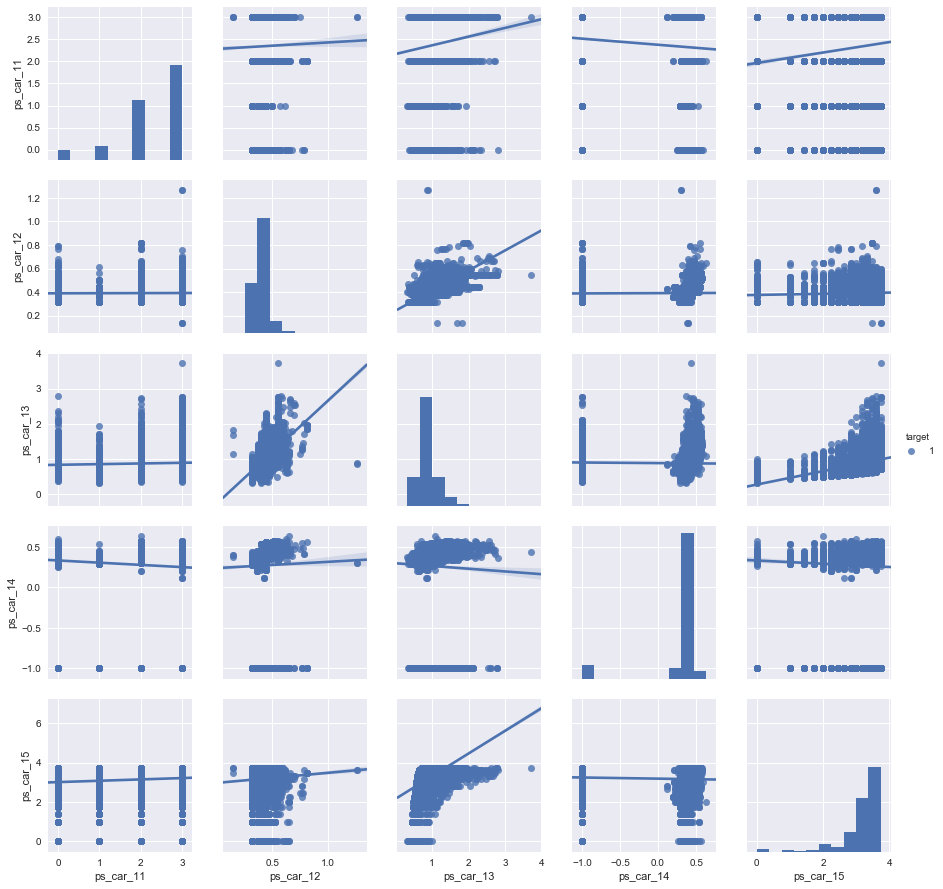

In [33]:
x_car = train_wo_id.loc[(train_wo_id["target"]==1),count_car_cont]
sns.pairplot(x_car,hue="target",vars=list(conti_var_col[conti_var_col.str.contains('car')==True]),kind="reg")
plt.show()

In [34]:
plt.savefig("continuous_car_dist.png")
#Closing the plot instance
plt.close()